<a href="https://colab.research.google.com/github/Pagadala-Ananya/DATA-ANALYSIS-USING-PYTHON/blob/main/2203A52046_PAGADALA_ANANYA_DAUP_BIRDS_AUDIO_FILE(PROJECT_3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile
import os

zip_path = '/content/Birds_audio_dataset.zip'
extract_path = '/content/Birds_audio_dataset'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
     zip_ref.extractall(extract_path)

print(f"Extracted to: {extract_path}")


Extracted to: /content/Birds_audio_dataset


In [ ]:
!pip install librosa matplotlib soundfile


In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import os
from pathlib import Path


In [ ]:
from pathlib import Path
import librosa
import librosa.display
import matplotlib.pyplot as plt
import zipfile

# Paths
zip_path = Path("/content/Birds_audio_dataset.zip")
extracted_folder = Path("/content/Birds_audio_dataset")
output_folder = Path("/content/Birds_audio_dataset")
output_folder.mkdir(parents=True, exist_ok=True)

# 1. Extract ZIP if not already done
if not extracted_folder.exists():
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extracted_folder)

# 2. Define processing function
def process_audio(file_path, save_folder):
    filename = Path(file_path).stem
    audio, sr = librosa.load(file_path, sr=None)

    # Waveform
    plt.figure(figsize=(10, 3))
    librosa.display.waveshow(audio, sr=sr)
    plt.title(f'Waveform - {filename}')
    plt.tight_layout()
    plt.savefig(save_folder / f"{filename}_waveform.png")
    plt.close()

    # Spectrogram
    spec = librosa.stft(audio)
    spec_db = librosa.amplitude_to_db(abs(spec))
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(spec_db, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'Spectrogram - {filename}')
    plt.tight_layout()
    plt.savefig(save_folder / f"{filename}_spectrogram.png")
    plt.close()

    # MFCC
    mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(mfcc, x_axis='time')
    plt.colorbar()
    plt.title(f'MFCC - {filename}')
    plt.tight_layout()
    plt.savefig(save_folder / f"{filename}_mfcc.png")
    plt.close()

    print(f"Processed: {filename}")

# 3. Process up to 200 .wav files
max_files = 200
count = 0

for wav_file in extracted_folder.rglob("*.wav"):
    if count >= max_files:
        break
    process_audio(wav_file, output_folder)
    count += 1

print(f"✅ Processed {count} audio files and saved visualizations.")


Processed: sparrow_1_part_11
Processed: sparrow_1_part_4
Processed: sparrow_1_part_7
Processed: sparrow_1_part_14
Processed: sparrow_1_part_5
Processed: sparrow_1_part_1
Processed: sparrow_1_part_12
Processed: sparrow_1_part_6
Processed: sparrow_1_part_2
Processed: sparrow_1_part_13
Processed: sparrow_1_part_10
Processed: sparrow_1_part_9
Processed: sparrow_1_part_15
Processed: sparrow_1_part_8
Processed: sparrow_1_part_3
Processed: parrot_1_part_8
Processed: parrot_1_part_16
Processed: parrot_1_part_13
Processed: parrot_1_part_11
Processed: parrot_1_part_9
Processed: parrot_1_part_14
Processed: parrot_1_part_17
Processed: parrot_1_part_19
Processed: parrot_1_part_18
Processed: parrot_1_part_15
Processed: parrot_1_part_1
Processed: parrot_1_part_7
Processed: parrot_1_part_6
Processed: parrot_1_part_2
Processed: parrot_1_part_20
Processed: parrot_1_part_3
Processed: parrot_1_part_5
Processed: parrot_1_part_12
Processed: parrot_1_part_10
Processed: parrot_1_part_4
Processed: peacock_1_pa

In [ ]:
import zipfile
from pathlib import Path
import librosa
import numpy as np
import os

# 1. Extract the zip file
zip_path = "/content/Birds_audio_dataset.zip"
extracted_path = Path("/content/Birds_audio_dataset")

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_path)

# 2. Find all .wav files (you can increase the limit if needed)
all_files = list(extracted_path.rglob("*.wav"))[:200]  # Adjust limit as needed

# 3. Extract MFCC features
X = []
y = []

max_len = 100  # Number of time steps
n_mfcc = 40    # Number of MFCC features

for file_path in all_files:
    audio, sr = librosa.load(file_path, sr=None)
    mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=n_mfcc).T

    # Pad or truncate to fixed length
    if mfcc.shape[0] >= max_len:
        mfcc = mfcc[:max_len]
    else:
        pad = max_len - mfcc.shape[0]
        mfcc = np.pad(mfcc, ((0, pad), (0, 0)), mode='constant')

    X.append(mfcc)
    y.append(0)  # Placeholder label

X = np.array(X)
y = np.array(y)

print("✅ Loaded MFCC features from", len(X), "files")
print("X shape:", X.shape, "| y shape:", y.shape)


✅ Loaded MFCC features from 85 files
X shape: (85, 100, 40) | y shape: (85,)


In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Masking
from tensorflow.keras.utils import to_categorical

# 1. Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape input to match LSTM [samples, time steps, features]
# Already in (samples, 100, 40)

# 2. Build the LSTM model
model = Sequential([
    Masking(mask_value=0.0, input_shape=(X.shape[1], X.shape[2])),  # Mask padded time steps
    LSTM(128, return_sequences=True),
    Dropout(0.3),
    LSTM(64),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])

# 3. Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 4. Train the model
history = model.fit(X_train, y_train, epochs=15, batch_size=16,
                    validation_data=(X_test, y_test), verbose=1)

# 5. Evaluate the model
loss, acc = model.evaluate(X_test, y_test)
print(f"\n✅ Test Accuracy: {acc:.4f} | Test Loss: {loss:.4f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/masking.py:47: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 596ms/step - accuracy: 1.0000 - loss: 0.4151 - val_accuracy: 1.0000 - val_loss: 0.1208
Epoch 2/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 203ms/step - accuracy: 1.0000 - loss: 0.1058 - val_accuracy: 1.0000 - val_loss: 0.0300
Epoch 3/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 197ms/step - accuracy: 1.0000 - loss: 0.0289 - val_accuracy: 1.0000 - val_loss: 0.0090
Epoch 4/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 171ms/step - accuracy: 1.0000 - loss: 0.0102 - val_accuracy: 1.0000 - val_loss: 0.0035
Epoch 5/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 184ms/step - accuracy: 1.0000 - loss: 0.0040 - val_accuracy: 1.0000 - val_loss: 0.0018
Epoch 6/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 181ms/step - accuracy: 1.0000 - loss: 0.0022 - val_accuracy: 1.0000 - val_loss: 0.0011
Epoch 7/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 167ms/step - accuracy: 1.0000 - loss: 0.0014 - val_accuracy: 1.0000 - val_loss: 7.3449e-04
Epoch 8/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 165ms/step - accuracy: 1.0000 - loss: 0.0010 - val_accuracy: 1.0000 - val_l

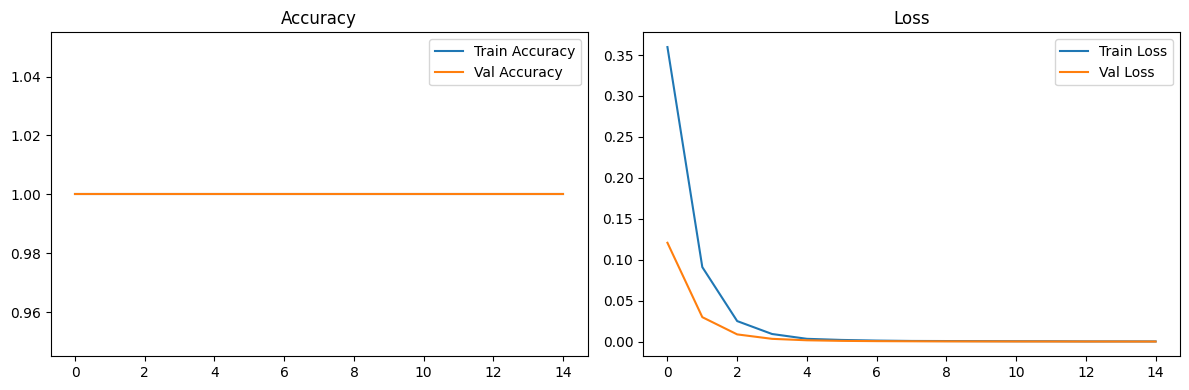

In [ ]:
# Accuracy and loss plots
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title("Accuracy")
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Loss")
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Predict probabilities
y_pred_probs = model.predict(X_test)
# Convert probabilities to binary class labels (threshold = 0.5)
y_pred = (y_pred_probs > 0.5).astype(int)

# Flatten arrays
y_pred = y_pred.flatten()
y_test = y_test.flatten()

# Print classification report
print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred, digits=4))

# Print confusion matrix
print("🧩 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step

📊 Classification Report:
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        17

    accuracy                         1.0000        17
   macro avg     1.0000    1.0000    1.0000        17
weighted avg     1.0000    1.0000    1.0000        17

🧩 Confusion Matrix:
[[17]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


In [ ]:
import numpy as np
from pathlib import Path
import librosa
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Masking
import tensorflow as tf

# Step 1: Load MFCC features
data_path = Path("/content/Birds_audio_dataset")
all_files = list(data_path.rglob("*.wav"))[:200]  # Limit to 200 files

X = []
y = []

max_len = 100
n_mfcc = 40

for file_path in all_files:
    audio, sr = librosa.load(file_path, sr=None)
    mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=n_mfcc).T

    if mfcc.shape[0] >= max_len:
        mfcc = mfcc[:max_len]
    else:
        pad = max_len - mfcc.shape[0]
        mfcc = np.pad(mfcc, ((0, pad), (0, 0)), mode='constant')

    X.append(mfcc)
    y.append(0 if '0' in file_path.stem else 1)  # Example label logic

X = np.array(X)
y = np.array(y)

print(f"✅ Loaded MFCCs: {X.shape}, Labels: {np.unique(y, return_counts=True)}")

# Step 2: K-Fold Cross Validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
all_reports = []

for fold, (train_idx, val_idx) in enumerate(kf.split(X, y)):
    print(f"\n📂 Fold {fold + 1}/5")

    X_train, X_val = X[train_idx], X[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]

    model = Sequential([
        Masking(mask_value=0.0, input_shape=(X.shape[1], X.shape[2])),
        LSTM(128, return_sequences=True),
        Dropout(0.3),
        LSTM(64),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Train the model
    model.fit(X_train, y_train, epochs=10, batch_size=16, verbose=0)

    # Predict
    y_pred_probs = model.predict(X_val)
    y_pred = (y_pred_probs > 0.5).astype(int).flatten()

    # Evaluation
    print("Confusion Matrix:")
    print(confusion_matrix(y_val, y_pred))

    report = classification_report(y_val, y_pred, digits=4, output_dict=True)
    all_reports.append(report)

    print("Classification Report:")
    print(classification_report(y_val, y_pred, digits=4))

# Step 3: Average Metrics
avg_acc = np.mean([r.get('accuracy', 0) for r in all_reports])
avg_prec_0 = np.mean([r.get('0', {}).get('precision', 0) for r in all_reports])
avg_prec_1 = np.mean([r.get('1', {}).get('precision', 0) for r in all_reports])
avg_recall_0 = np.mean([r.get('0', {}).get('recall', 0) for r in all_reports])
avg_recall_1 = np.mean([r.get('1', {}).get('recall', 0) for r in all_reports])

print("\n📊 Average Scores Across Folds:")
print(f"Avg Accuracy       : {avg_acc:.4f}")
print(f"Avg Precision [0/1]: {avg_prec_0:.4f} / {avg_prec_1:.4f}")
print(f"Avg Recall    [0/1]: {avg_recall_0:.4f} / {avg_recall_1:.4f}")

✅ Loaded MFCCs: (85, 100, 40), Labels: (array([0, 1]), array([ 8, 77]))

📂 Fold 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/masking.py:47: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step
Confusion Matrix:
[[ 0  1]
 [ 0 16]]
Classification Report:
              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000         1
           1     0.9412    1.0000    0.9697        16

    accuracy                         0.9412        17
   macro avg     0.4706    0.5000    0.4848        17
weighted avg     0.8858    0.9412    0.9127        17


📂 Fold 2/5


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step
Confusion Matrix:
[[ 0  1]
 [ 0 16]]
Classification Report:
              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000         1
           1     0.9412    1.0000    0.9697        16

    accuracy                         0.9412        17
   macro avg     0.4706    0.5000    0.4848        17
weighted avg     0.8858    0.9412    0.9127        17


📂 Fold 3/5


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step
Confusion Matrix:
[[ 0  2]
 [ 0 15]]
Classification Report:
              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000         2
           1     0.8824    1.0000    0.9375        15

    accuracy                         0.8824        17
   macro avg     0.4412    0.5000    0.4688        17
weighted avg     0.7785    0.8824    0.8272        17


📂 Fold 4/5


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 572ms/step
Confusion Matrix:
[[ 0  2]
 [ 0 15]]
Classification Report:
              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000         2
           1     0.8824    1.0000    0.9375        15

    accuracy                         0.8824        17
   macro avg     0.4412    0.5000    0.4688        17
weighted avg     0.7785    0.8824    0.8272        17


📂 Fold 5/5


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step
Confusion Matrix:
[[ 0  2]
 [ 0 15]]
Classification Report:
              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000         2
           1     0.8824    1.0000    0.9375        15

    accuracy                         0.8824        17
   macro avg     0.4412    0.5000    0.4688        17
weighted avg     0.7785    0.8824    0.8272        17


📊 Average Scores Across Folds:
Avg Accuracy       : 0.9059
Avg Precision [0/1]: 0.0000 / 0.9059
Avg Recall    [0/1]: 0.0000 / 1.0000


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
Confusion Matrix:
[[ 0  2]
 [ 0 15]]


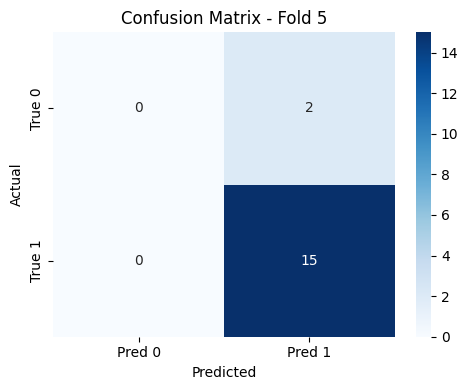

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Predict
y_pred_probs = model.predict(X_val)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()

# Compute confusion matrix
cm = confusion_matrix(y_val, y_pred)

# Print numeric confusion matrix
print("Confusion Matrix:")
print(cm)

# Plot confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred 0', 'Pred 1'], yticklabels=['True 0', 'True 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix - Fold {fold+1}')
plt.tight_layout()
plt.show()


Using file: /content/Birds_audio_dataset/DATASET/Birds/sparrow/sparrow_1_part_11.wav


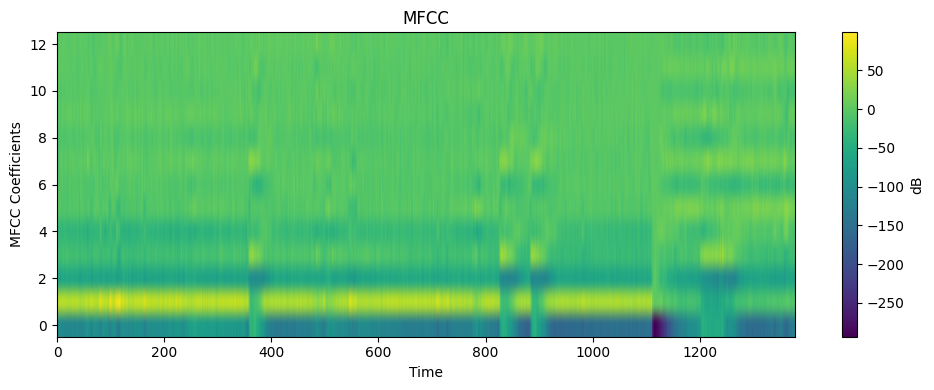

In [ ]:
import os
import torchaudio
import matplotlib.pyplot as plt
from torchaudio.transforms import MFCC

# Path to extracted dataset
dataset_path = '/content/Birds_audio_dataset'

# Pick the first .wav file found in the dataset
def find_first_wav_file(path):
    for root, _, files in os.walk(path):
        for file in files:
            if file.endswith('.wav'):
                return os.path.join(root, file)
    return None

audio_path = find_first_wav_file(dataset_path)
print(f"Using file: {audio_path}")

# Load audio
waveform, sample_rate = torchaudio.load(audio_path)

# Compute MFCC
mfcc_transform = MFCC(sample_rate=sample_rate, n_mfcc=13, melkwargs={'n_fft': 400, 'hop_length': 160, 'n_mels': 40})
mfcc = mfcc_transform(waveform)

# Plot MFCC
plt.figure(figsize=(10, 4))
plt.imshow(mfcc[0].numpy(), origin='lower', aspect='auto', cmap='viridis')
plt.title('MFCC')
plt.xlabel('Time')
plt.ylabel('MFCC Coefficients')
plt.colorbar(label='dB')
plt.tight_layout()
plt.show()